# Plot graph and basic analysis
- for undirected, multigraph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [2]:
# read .gml file
graph = nx.read_gml('article1.gml')

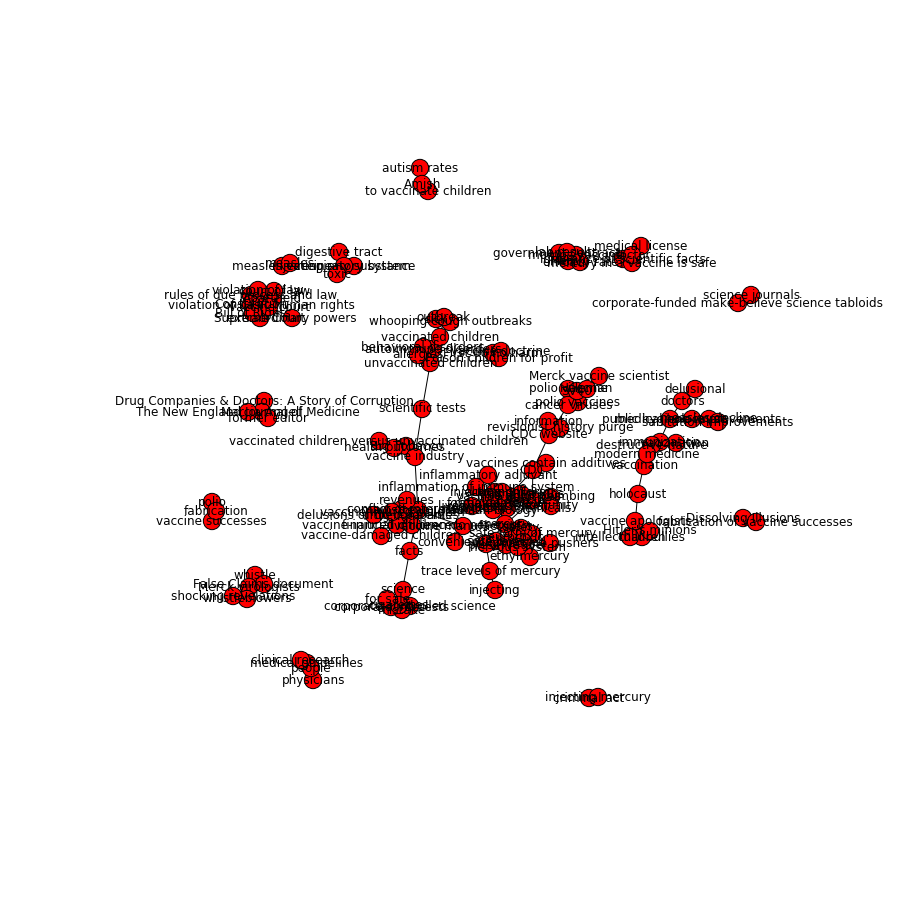

In [3]:
# plot spring layout
plt.figure(figsize=(12,12))
nx.draw_spring(graph, with_labels=True, arrows=True)

In [5]:
info = nx.info(graph)
print info

Name: 
Type: MultiGraph
Number of nodes: 140
Number of edges: 147
Average degree:   2.1000


## Degree histogram
Return a list of the frequency of each degree value

In [6]:
# returns a list of frequencies of degrees;
# The degree values are the index in the list.
nx.degree_histogram(graph)

[0, 77, 32, 7, 11, 6, 3, 1, 0, 1, 1, 0, 0, 0, 1]

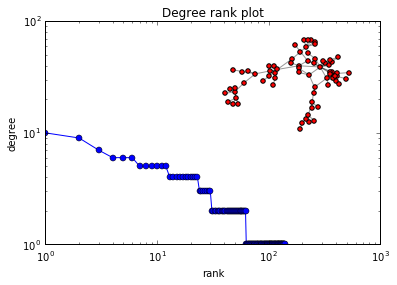

In [20]:
degree_sequence=sorted(nx.degree(graph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(graph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

## Density
Notes: The density is 0 for a graph without edges and 1 for a complete graph. The density of multigraphs can be higher than 1.

Self loops are counted in the total number of edges so graphs with self loops can have density higher than 1.

In [8]:
nx.density(graph)

0.015107913669064749

## Degree centrality
- Degree centrality for a node v is the fraction of nodes it is connected to

In [9]:
# get all the values of the dictionary, this returns a list of centrality scores
# turn the list into a numpy array
# take the mean of the numpy array
deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
print "Degree centrality =", deg_cen

Degree centrality = 0.0151079136691


## Closeness centrality
- Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1
- Higher values of closeness indicate higher centrality

In [10]:
clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
print "Closeness centrality =", clo_cen

Closeness centrality = 0.0614301831538


## Betweenness centrality
- Betweenness centrality of a node v is the sum of the fraction of all pairs shortest paths that pass through v
    - Compute the shortest-path betweenness centrality for nodes

In [11]:
nx.betweenness_centrality(graph)
bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
print "Betweenness centrality =", bet_cen

Betweenness centrality = 0.00791441381057


### Current-flow betweenness centrality
- Current-flow betweenness centrality uses an electrical current model for information spreading in contrast to betweenness centrality which uses shortest paths.
- Current-flow betweenness centrality is also known as random-walk betweenness centrality

In [12]:
# graph must be connected
# nx.current_flow_betweenness_centrality(graph)

## Degree assortativity coefficient

In [13]:
deg_ac = nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient =", deg_ac

Degree assortativity coefficient = -0.178601405939


## Degree pearson correlation coefficient
Assortativity measures the similarity of connections in the graph with respect to the node negree
- Returns r -- Assortativity of graph by degree

In [14]:
deg_pcc = nx.degree_pearson_correlation_coefficient(graph)
print "Degree pearson correlation coefficient =", deg_pcc

Degree pearson correlation coefficient = -0.178601405939


In [15]:
## Clustering coefficient
# (cannot be multigraph)
# nx.average_clustering(graph)

## Condensation
# nx.condensation(graph)

## Average node connectivity
- The average connectivity \bar{\kappa} of a graph G is the average of local node connectivity over all pairs of nodes of G

In [16]:
#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)
avg_node_con = nx.average_node_connectivity(graph)
print "Average node connectivity =", avg_node_con

Average node connectivity = 0.289311408016


## Closeness vitality
Compute closeness vitality for nodes.

Closeness vitality of a node is the change in the sum of distances between all node pairs when excluding that node.

#### Example:

Closeness vitality = {0: 4.0, 1: 4.0, 2: 4.0}


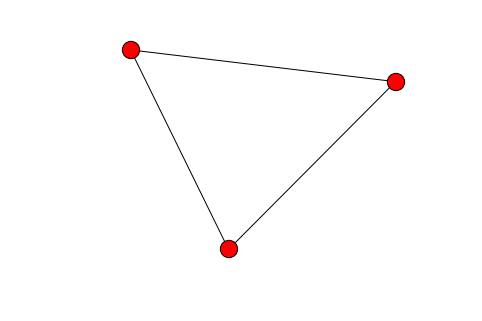

In [17]:
# example
G = nx.cycle_graph(3)
nx.draw(G)
clo_vit = nx.closeness_vitality(G)
print "Closeness vitality =", clo_vit

In [ ]:
nx.closeness_vitality(graph)

In [ ]:
# intersection_all()
# return a new graph that contains only the edges that exist in all graphs
# all supplied graphs must have the same node set

In [ ]:
graph2 = nx.tutte_graph(graph)
nx.draw(graph2)